In [60]:
import networkx as nx
import matplotlib.pyplot as plt

d=4/5

def init(succ,save,name="untitled.png"):
    successeurs = succ
    N=len(succ)
    score = [1/N]*N
    predecesseur = getPredecessor(successeurs)
    algo(successeurs,predecesseur, N, score)
    drawGraph(successeurs,save,name)

def getPredecessor(succ):
    pred=[]
    for i in range(len(succ)):
        pred.append([])
    for i,l in enumerate(succ):
        for j in l:
            pred[j].append(i)
    return pred

def calcScore(pred, succ, current, N, score):
    sum=0
    for j in range(0,len(pred[current])):
        nbSucc = len(succ[pred[current][j]])
        if(nbSucc !=0):
            sum += score[pred[current][j]]/nbSucc
    return d * sum + (1-d) * 1/N

def algo(succ, pred, N, score):
    for i in range(0,30):
        for j in range(0,N):
            score[j] = calcScore(pred, succ, j, N, score)
    total=0
    for i in range(0,N):
        print(i,":", score[i])
        total+=score[i]
    print("total : "+str(total))
    
def drawGraph(succ,save,name="unitled.png"):
    G = nx.DiGraph()
    for i,j in enumerate(succ):
        for k in j:
            G.add_edge(i,k)
    #G.add_edges_from([(0,1), (1,2), (1,3), (2,3)])
    pos=nx.spring_layout(G) # positions for all nodes
    elarge=[(u,v) for (u,v,d) in G.edges(data=True)]

    # drawing
    nx.draw_networkx_nodes(G,pos,node_size=500)
    nx.draw_networkx_edges(G,pos,edgelist=elarge,width=3)
    nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')
    plt.axis('off')
    if(save):
        plt.savefig(name) # save as png
    plt.show() # display
    plt.show()

    print(nx.pagerank(G, alpha=0.9))


0 : 0.3632075594650505
1 : 0.1952830237860202
2 : 0.39150944281483635
3 : 0.04999999999999999
total : 1.000000026065907


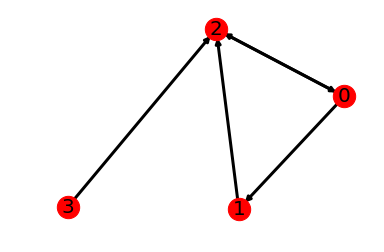

{0: 0.381779162801134, 1: 0.1968006232605103, 2: 0.3964202139383563, 3: 0.024999999999999994}


In [61]:
successeurs = [[1,2],[2],[0],[2]]
init(successeurs,False)

In [ ]:
successeurs = [[1,2],[2],[0],[2]]
init(successeurs,False)
